### Video Game Sales- Who Wins?

#### Let's take a look at some video game sales data from the 1980s to the the late 2010s. This data tracks popular platform releases over time, sales, and various ranking criteria. 

We'll keep two questions in mind as we explore the data. 
> - 1. Which country has the highest video game sales?
> - 2. Is there a trend in genre when compared to sales by region?

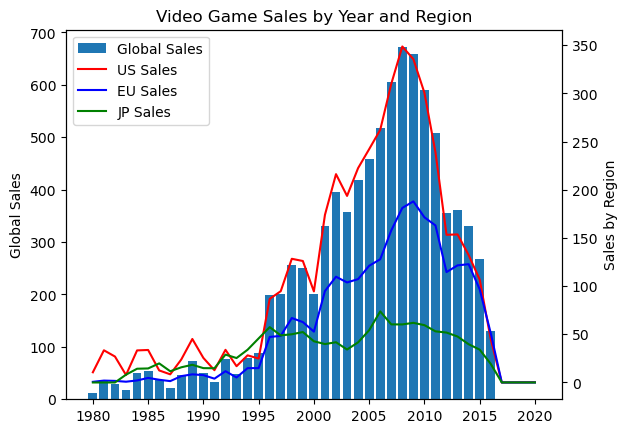

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

#Video Game Sales Data (Kirubi, 2016)

data = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

grouped_data = data.groupby('Year_of_Release')

global_sales = grouped_data['Global_Sales'].sum()

na_sales = grouped_data['NA_Sales'].sum()
eu_sales = grouped_data['EU_Sales'].sum()
jp_sales = grouped_data['JP_Sales'].sum()

fig, ax1 = plt.subplots()

ax1.bar(global_sales.index, global_sales.values, label='Global Sales')
ax1.set_ylabel('Global Sales')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

ax2.plot(na_sales.index, na_sales.values, label='US Sales', color='red')
ax2.plot(eu_sales.index, eu_sales.values, label='EU Sales', color='blue')
ax2.plot(jp_sales.index, jp_sales.values, label='JP Sales', color='green')
ax2.set_ylabel('Sales by Region')
ax2.tick_params(axis='y')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.title('Video Game Sales by Year and Region')
plt.xlabel('Year')
plt.show()


In the chart above, a slightly unexpected turn of events is uncovered. I did not expect the US gross sales to have such an impact on global sales.

Let's take it from another view regarding sales data. If we visualize the sales data by genre, I wonder if we would semilar results.

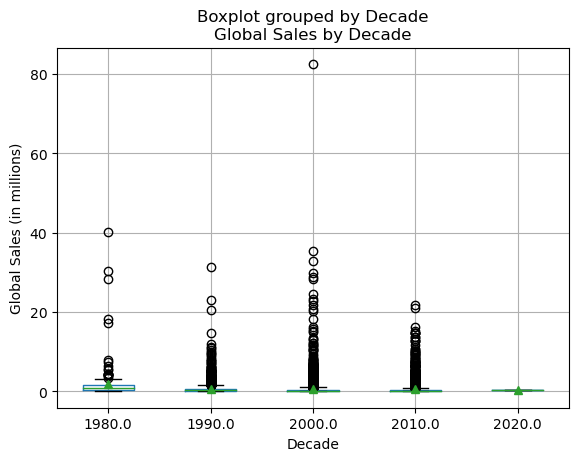

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df = data

df['Decade'] = (df['Year_of_Release'] // 10) * 10

df.boxplot(column='Global_Sales', by='Decade', showmeans=True)

plt.title('Global Sales by Decade')
plt.xlabel('Decade')
plt.ylabel('Global Sales (in millions)')

plt.show()

On a bivariate approach, an intriguing correlation is found between the rating given by the critics and the total number of sales worldwide. The sales trend is heading in the right direction if the critics score is high.

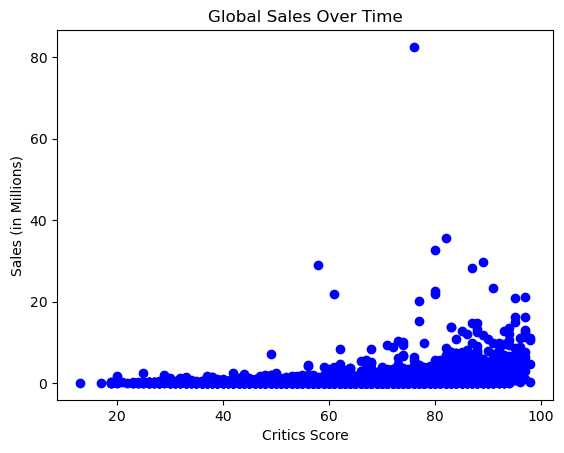

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

df = data

plt.scatter(df['Critic_Score'], df['Global_Sales'], color='blue')

plt.title('Global Sales Over Time')
plt.xlabel('Critics Score')
plt.ylabel('Sales (in Millions)')

plt.show()





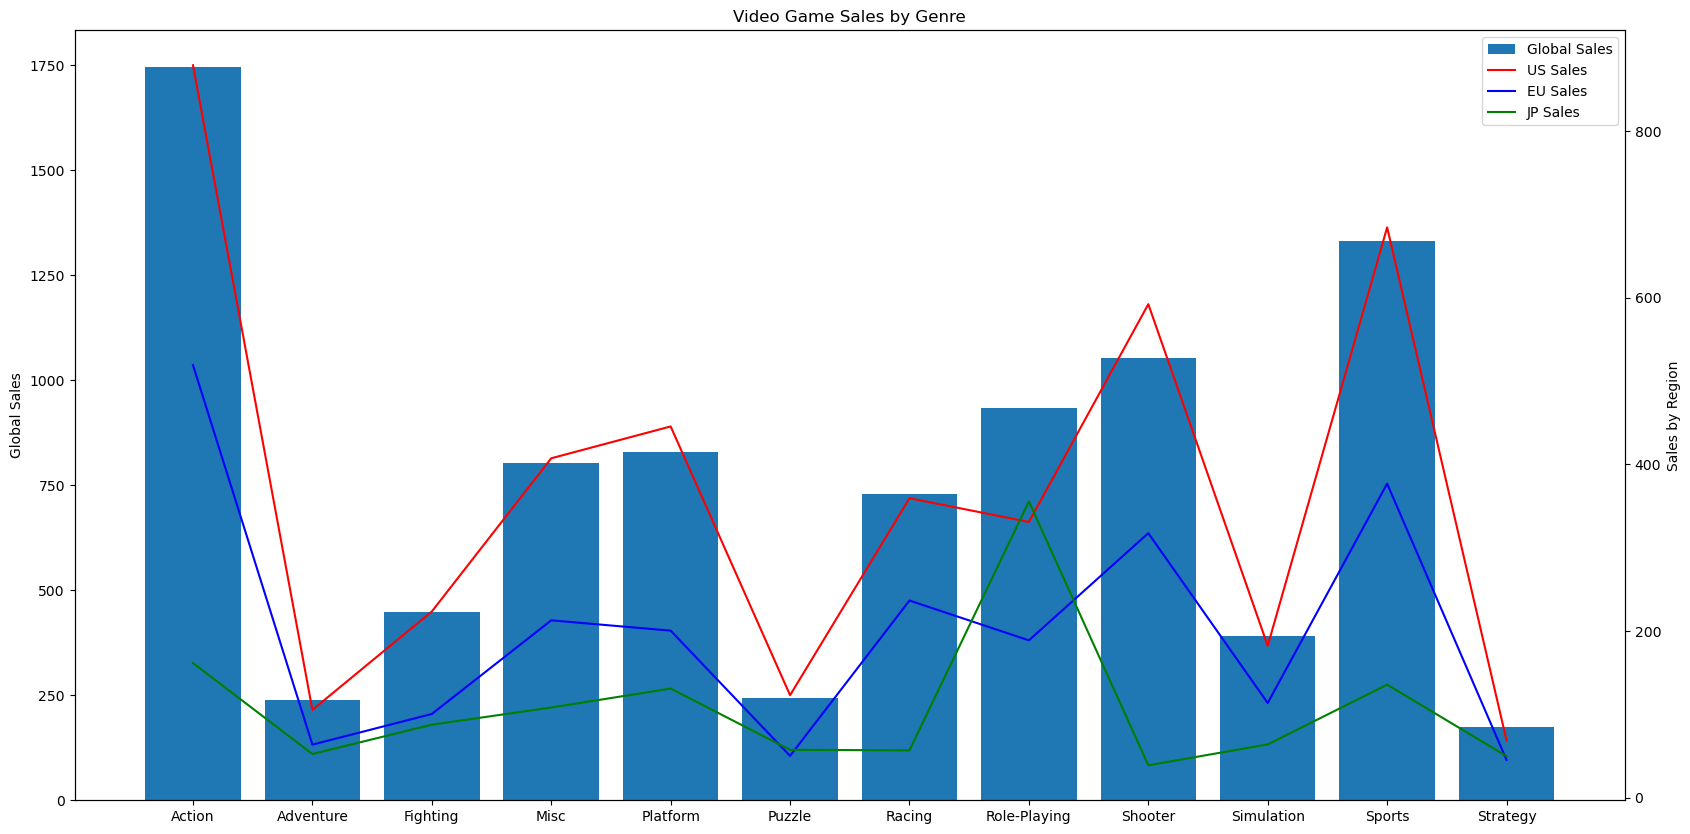

In [63]:
import pandas as pd
import matplotlib.pyplot as plt


grouped_data = data.groupby('Genre')

global_sales = grouped_data['Global_Sales'].sum()

na_sales = grouped_data['NA_Sales'].sum()
eu_sales = grouped_data['EU_Sales'].sum()
jp_sales = grouped_data['JP_Sales'].sum()

fig, ax1 = plt.subplots(figsize=(20,10))

ax1.bar(global_sales.index, global_sales.values, label='Global Sales')
ax1.set_ylabel('Global Sales')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

ax2.plot(na_sales.index, na_sales.values, label='US Sales', color='red')
ax2.plot(eu_sales.index, eu_sales.values, label='EU Sales', color='blue')
ax2.plot(jp_sales.index, jp_sales.values, label='JP Sales', color='green')
ax2.set_ylabel('Sales by Region')
ax2.tick_params(axis='y')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.title('Video Game Sales by Genre')
plt.xlabel('Genre')
plt.show()

### Summary
When we looked at the sales of video games from 1980 all the way up until 2010, we found some fascinating results. To begin, we came to the conclusion that the sales made in the United States have a significant effect on the market as a whole because consumers in the United States account for a significant portion of global sales. Because of this, I initially came to the opinion that the United States is a leader in global sales. Although we did not have access to all of the data regarding consumer purchases, the user count broken down by area indicated that the United States continued to hold a significant portion of the international market.

Could we identify a pattern based on the type of product sold? According to the data, the action genre had the highest gross in sales, and once again, sales in the United States had a significant impact, with sales in Europe not far behind.

### Reference
Kirubi, R. (2016, December 30). Video game sales with ratings. Kaggle. Retrieved March 20, 2023, from https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings 